In [1]:
library(edgeR)
library(ggplot2)

Loading required package: limma

Warning message:
“package ‘ggplot2’ was built under R version 4.0.0”


## 1. load in data

In [2]:
raw_filename            = '../data/16p12_lcl_gene_reads_underscores.gct'
pheno_filename          = '../data/pheno_final.tsv'

In [3]:
pheno                   = read.table(pheno_filename, sep='\t', header=TRUE)
rownames(pheno)         = pheno$sample

In [5]:
rawdf               = read.table(raw_filename, sep='\t', header=TRUE)
rownames(rawdf)     = rawdf$Name
rawdf$Name          = NULL

In [6]:
gencode2ensembl = function(s) {
    return(strsplit(s, '.', fixed=T)[[1]][1])
}

rownames(rawdf) = unlist(lapply(rownames(rawdf), gencode2ensembl))
rawmat          = as.matrix(rawdf)

pheno = pheno[colnames(rawmat),]

## quasi-likelihood F-Test (deletion carrier vs non carrier)

In [8]:
group         = pheno$status3
family        = pheno$family

In [9]:
y = DGEList(counts=rawmat, group=NULL)
y = calcNormFactors(y)

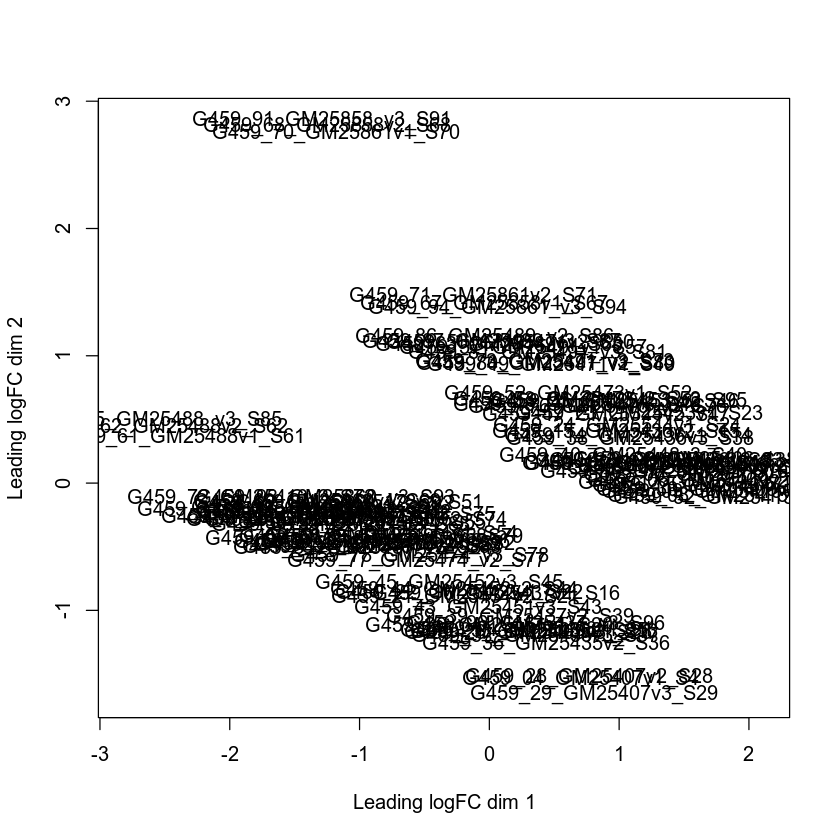

In [14]:
p = plotMDS(y, col=as.numeric(y$samples$group))


In [15]:
df_save = p$cmdscale.out
df_save = cbind(rownames(df_save), df_save)
write.table(df_save, 'S3a_MDS.tsv', row.names = F, sep='\t')